In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy
from my_key import open_key
#Importing the necessary library and key
#Notes: The Temperature are given in Kelvin.

In [4]:
city_name = "sydney"
#checking the data with city 

In [5]:
url = f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={open_key}'

In [6]:
req = requests.get(url)
data = req.json()
data

{'coord': {'lon': 151.2073, 'lat': -33.8679},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 288.39,
  'feels_like': 287.85,
  'temp_min': 287.39,
  'temp_max': 289.59,
  'pressure': 1033,
  'humidity': 72,
  'sea_level': 1033,
  'grnd_level': 1025},
 'visibility': 10000,
 'wind': {'speed': 8.75, 'deg': 190},
 'clouds': {'all': 40},
 'dt': 1719973313,
 'sys': {'type': 2,
  'id': 2018875,
  'country': 'AU',
  'sunrise': 1719954046,
  'sunset': 1719989860},
 'timezone': 36000,
 'id': 2147714,
 'name': 'Sydney',
 'cod': 200}

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [31]:
base_url = "https://api.openweathermap.org/data/2.5/weather"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={open_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | hell-ville
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | bardai
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | puerto penasco
Processing Record 9 of Set 1 | kapuskasing
Processing Record 10 of Set 1 | fort saskatchewan
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | colonia
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | zagora
Processing Record 21 of Set 1 | zaragoza
Processing Record 22 of Set 1 | stanley

In [33]:
city_data_df = pd.DataFrame(city_data)

In [37]:
city_data_df.head()
#Checking The head of the dataframe.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chonchi,-42.6128,-73.8092,277.10,84,51,2.90,CL,1719976489
1,hell-ville,-13.4000,48.2667,294.08,74,75,1.03,MG,1719976491
2,jamestown,42.0970,-79.2353,293.95,68,0,3.60,US,1719976494
3,port-aux-francais,-49.3500,70.2167,274.11,56,62,8.48,TF,1719976496
4,yellowknife,62.4560,-114.3525,294.49,50,75,4.63,CA,1719976498


In [39]:
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [105]:
city_data_df.to_csv(r'C:\Users\karki\Desktop\weather.data\weather1.csv', index_label="City_ID")
#exporting Csv in to local storage

In [107]:
city_data = pd.read_csv(r'C:\Users\karki\Desktop\weather.data\weather1.csv')
# Importing the CSV from local storage to use.

In [109]:
city_data.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,chonchi,-42.6128,-73.8092,277.10,84,51,2.90,CL,1719976489
1,1,hell-ville,-13.4000,48.2667,294.08,74,75,1.03,MG,1719976491
2,2,jamestown,42.0970,-79.2353,293.95,68,0,3.60,US,1719976494
3,3,port-aux-francais,-49.3500,70.2167,274.11,56,62,8.48,TF,1719976496
4,4,yellowknife,62.4560,-114.3525,294.49,50,75,4.63,CA,1719976498


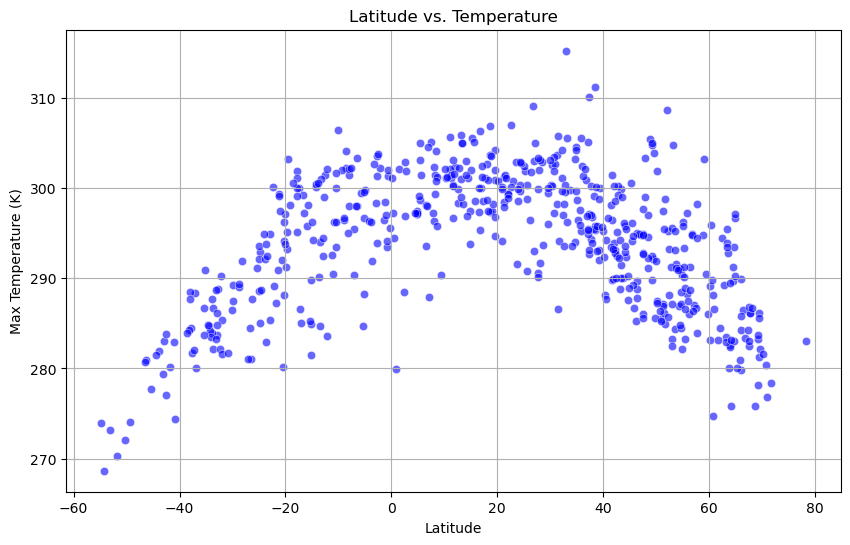

In [111]:
latitudes = city_data['Lat']
temperatures = city_data['Max Temp']

# Building the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, temperatures, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(True)
plt.show()

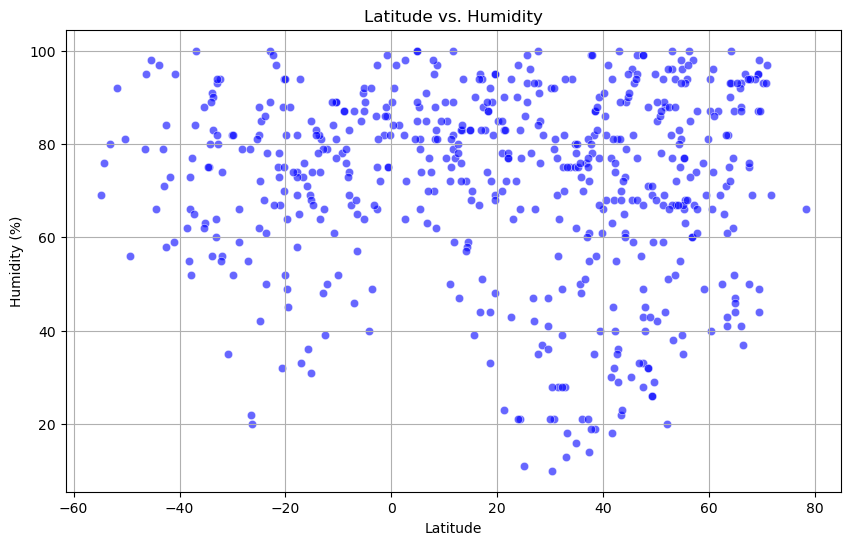

In [115]:
latitudes = city_data['Lat']
Humidity = city_data['Humidity']

# Building the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, Humidity, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

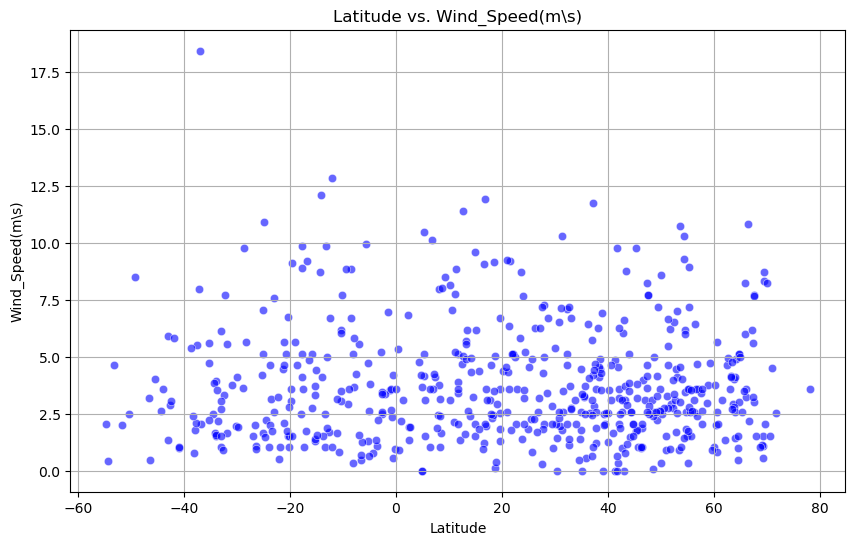

In [123]:
latitudes = city_data['Lat']
Wind_Speed = city_data['Wind Speed']

# Building the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latitudes, Wind_Speed, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Latitude vs. Wind_Speed(m\s)')
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed(m\s)')
plt.grid(True)
plt.show()

In [125]:
northern_hemi_data = city_data[city_data['Lat'] >= 0]

In [127]:
northern_hemi_data.head()
#Filtering the data by northern hem.

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,jamestown,42.0970,-79.2353,293.95,68,0,3.60,US,1719976494
4,4,yellowknife,62.4560,-114.3525,294.49,50,75,4.63,CA,1719976498
5,5,bardai,11.6500,7.2333,296.64,82,91,3.90,NG,1719976501
7,7,puerto penasco,31.3167,-113.5333,303.66,77,0,1.79,MX,1719976506
8,8,kapuskasing,49.4169,-82.4331,292.15,59,100,7.20,CA,1719976508


In [129]:
southern_hemi_data = city_data[city_data['Lat'] <= 0]
southern_hemi_data.head()
#filtering the data by southern Hem.

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,chonchi,-42.6128,-73.8092,277.10,84,51,2.90,CL,1719976489
1,1,hell-ville,-13.4000,48.2667,294.08,74,75,1.03,MG,1719976491
3,3,port-aux-francais,-49.3500,70.2167,274.11,56,62,8.48,TF,1719976496
6,6,carnarvon,-24.8667,113.6333,292.94,42,0,10.90,AU,1719976504
10,10,lebu,-37.6167,-73.6500,281.72,77,97,5.51,CL,1719976513


In [193]:
northern_latitudes = northern_hemi_data['Lat']
northern_temperatures = northern_hemi_data['Max Temp']

In [197]:
northern_Humidity = northern_hemi_data['Humidity']
northern_Cloudiness = northern_hemi_data['Cloudiness']
northern_windspeed = northern_hemi_data['Wind Speed']
# Defining the data to use in linear regression and plotting the scatter plot.

In [199]:
slope, intercept, r_value, p_value, std_err = linregress(northern_latitudes, northern_Humidity)

In [201]:
regression_lineH = slope * northern_latitudes + intercept

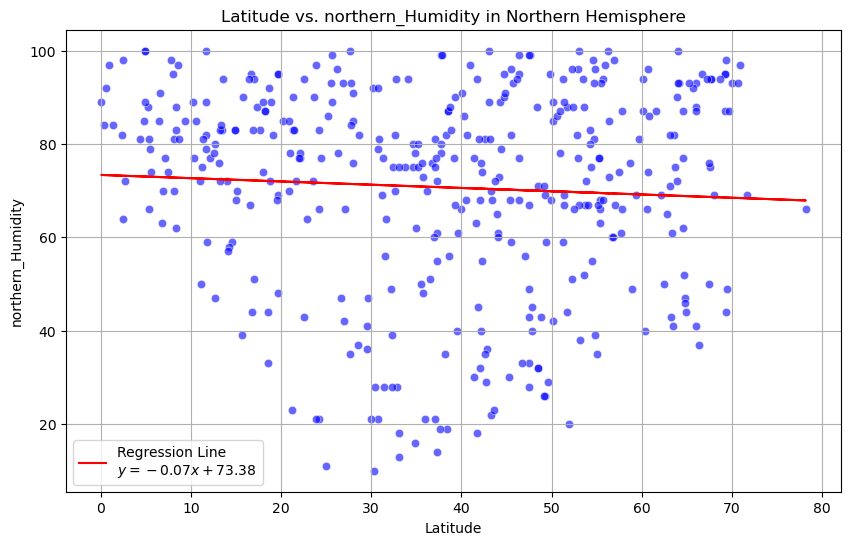

In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(northern_latitudes, northern_Humidity, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot(northern_latitudes, regression_lineH, color='red', label=f'Regression Line\n$y={slope:.2f}x+{intercept:.2f}$')
plt.title('Latitude vs. northern_Humidity in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('northern_Humidity')
plt.legend()
plt.grid(True)
plt.show()

In [205]:
slope, intercept, r_value, p_value, std_err = linregress(northern_latitudes, northern_Cloudiness)

In [207]:
regression_lineC = slope * northern_latitudes + intercept

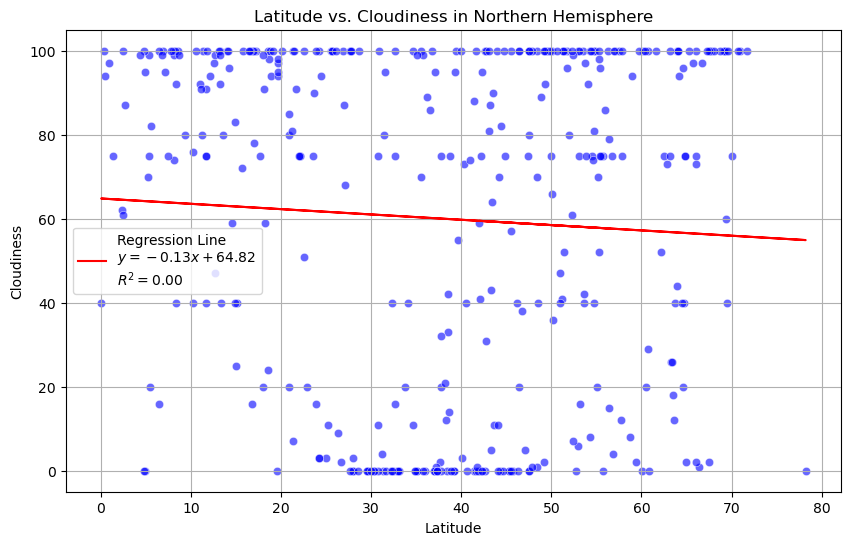

In [209]:
plt.figure(figsize=(10, 6))
plt.scatter(northern_latitudes, northern_Cloudiness, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot(northern_latitudes, regression_lineC, color='red', label=f'Regression Line\n$y={slope:.2f}x+{intercept:.2f}$\n$R^2={r_value**2:.2f}$')
plt.title('Latitude vs. Cloudiness in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.grid(True)
plt.show()

In [215]:
slope, intercept, r_value, p_value, std_err = linregress(northern_latitudes, northern_windspeed)

In [217]:
regression_lineW = slope * northern_latitudes + intercept

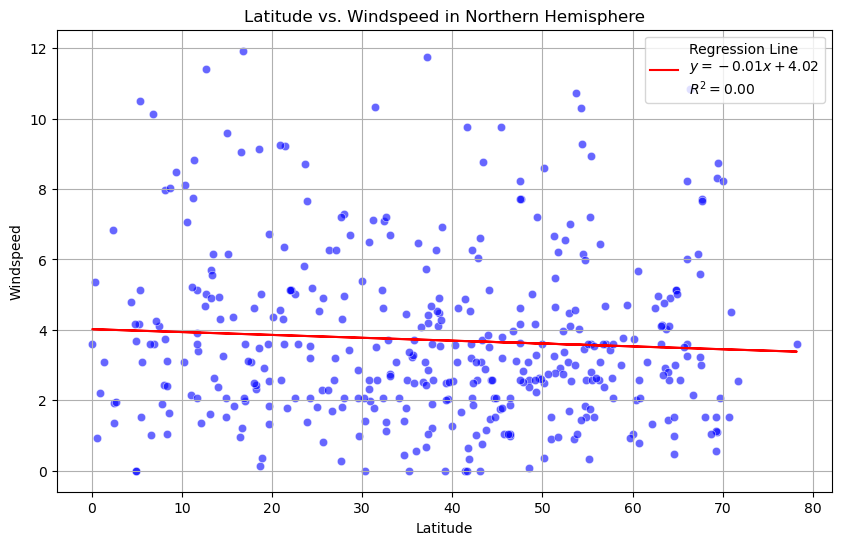

In [221]:
plt.figure(figsize=(10, 6))
plt.scatter(northern_latitudes, northern_windspeed, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot(northern_latitudes, regression_lineW, color='red', label=f'Regression Line\n$y={slope:.2f}x+{intercept:.2f}$\n$R^2={r_value**2:.2f}$')
plt.title('Latitude vs. Windspeed in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.legend()
plt.grid(True)
plt.show()

In [223]:
slope, intercept, r_value, p_value, std_err = linregress(northern_latitudes, northern_temperatures)

In [225]:
regression_lineT = slope * northern_latitudes + intercept

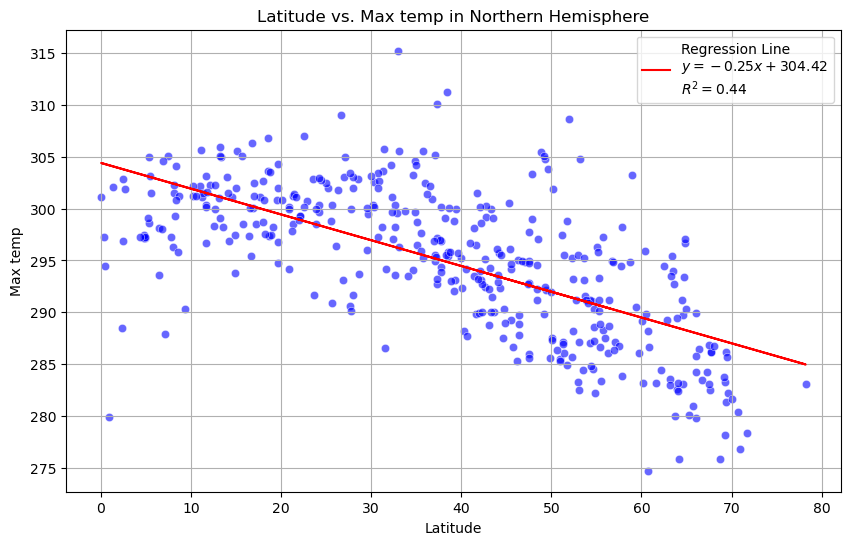

In [227]:
plt.figure(figsize=(10, 6))
plt.scatter(northern_latitudes, northern_temperatures, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot(northern_latitudes, regression_lineT, color='red', label=f'Regression Line\n$y={slope:.2f}x+{intercept:.2f}$\n$R^2={r_value**2:.2f}$')
plt.title('Latitude vs. Max temp in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max temp')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
southern_hemi_data.head()
#scatterplot and relation for the southern hem.

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,chonchi,-42.6128,-73.8092,277.10,84,51,2.90,CL,1719976489
1,1,hell-ville,-13.4000,48.2667,294.08,74,75,1.03,MG,1719976491
3,3,port-aux-francais,-49.3500,70.2167,274.11,56,62,8.48,TF,1719976496
6,6,carnarvon,-24.8667,113.6333,292.94,42,0,10.90,AU,1719976504
10,10,lebu,-37.6167,-73.6500,281.72,77,97,5.51,CL,1719976513


In [232]:
Southern_latitudes = southern_hemi_data['Lat']
Southern_temperatures = southern_hemi_data['Max Temp']
Southern_Humidity = southern_hemi_data['Humidity']
Southern_Cloudiness = southern_hemi_data['Cloudiness']
Southern_windspeed = southern_hemi_data['Wind Speed']
#Defining the columns for easy use

In [238]:
slope, intercept, r_value, p_value, std_err = linregress(Southern_latitudes, Southern_temperatures)

In [240]:
regression_lineT1 = slope * Southern_latitudes + intercept

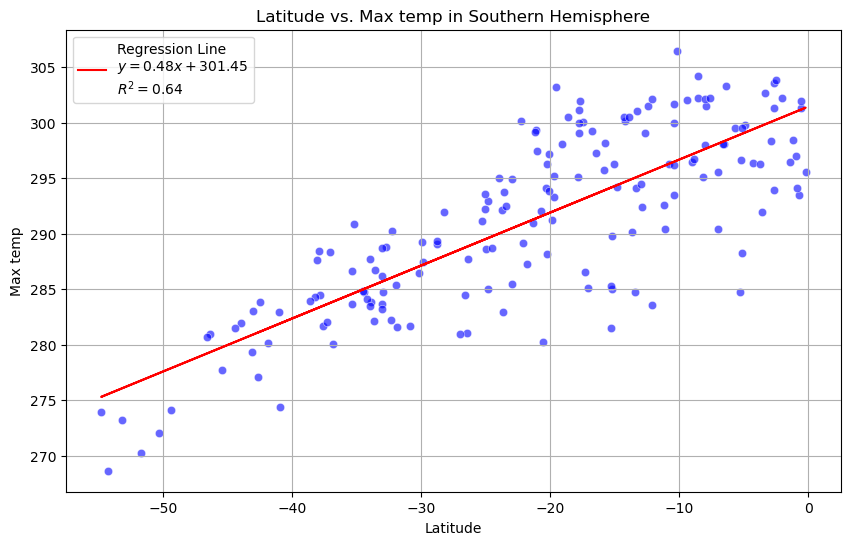

In [242]:
plt.figure(figsize=(10, 6))
plt.scatter(Southern_latitudes, Southern_temperatures, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot(Southern_latitudes, regression_lineT1, color='red', label=f'Regression Line\n$y={slope:.2f}x+{intercept:.2f}$\n$R^2={r_value**2:.2f}$')
plt.title('Latitude vs. Max temp in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max temp')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
slope, intercept, r_value, p_value, std_err = linregress(Southern_latitudes, Southern_Humidity)

In [246]:
regression_lineH1 = slope * Southern_latitudes + intercept

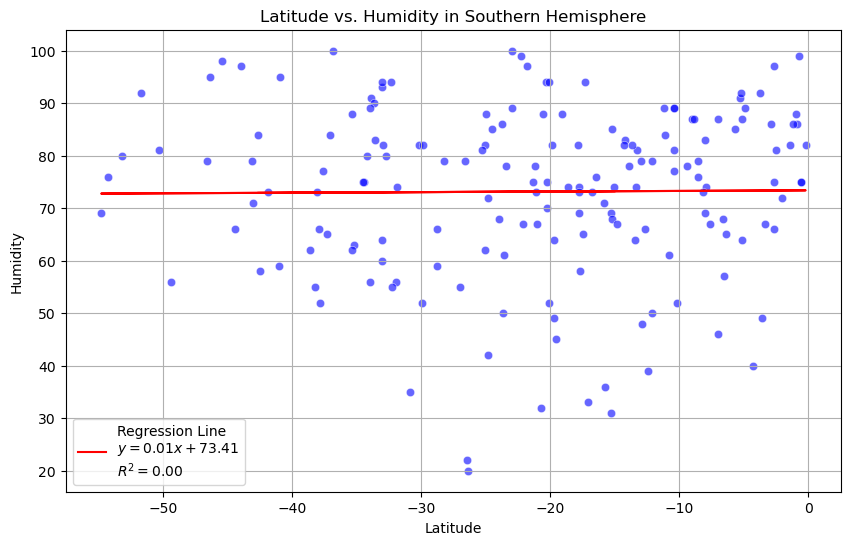

In [250]:
plt.figure(figsize=(10, 6))
plt.scatter(Southern_latitudes, Southern_Humidity, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot(Southern_latitudes, regression_lineH1, color='red', label=f'Regression Line\n$y={slope:.2f}x+{intercept:.2f}$\n$R^2={r_value**2:.2f}$')
plt.title('Latitude vs. Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

In [252]:
slope, intercept, r_value, p_value, std_err = linregress(Southern_latitudes, Southern_Cloudiness)

In [254]:
regression_lineC1 = slope * Southern_latitudes + intercept

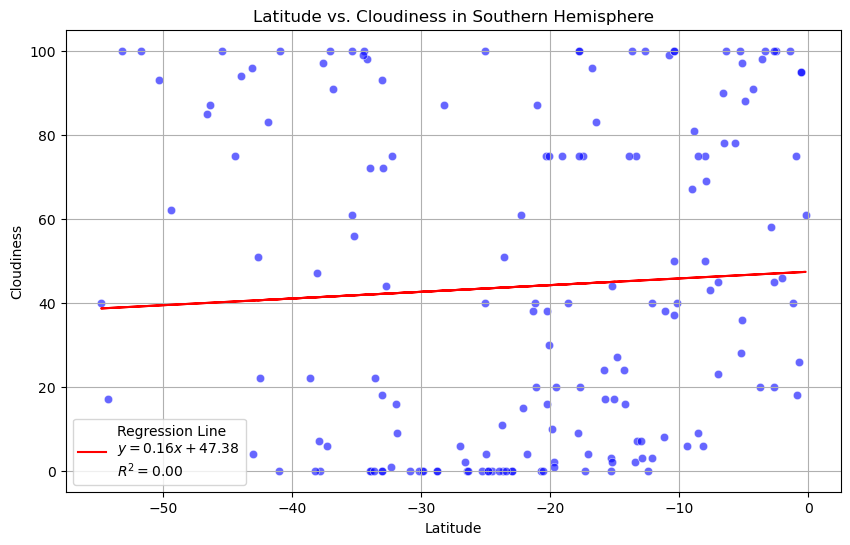

In [256]:
plt.figure(figsize=(10, 6))
plt.scatter(Southern_latitudes, Southern_Cloudiness, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot(Southern_latitudes, regression_lineC1, color='red', label=f'Regression Line\n$y={slope:.2f}x+{intercept:.2f}$\n$R^2={r_value**2:.2f}$')
plt.title('Latitude vs. Cloudiness in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.legend()
plt.grid(True)
plt.show()

In [258]:
slope, intercept, r_value, p_value, std_err = linregress(Southern_latitudes, Southern_windspeed)

In [260]:
regression_lineW1 = slope * Southern_latitudes + intercept

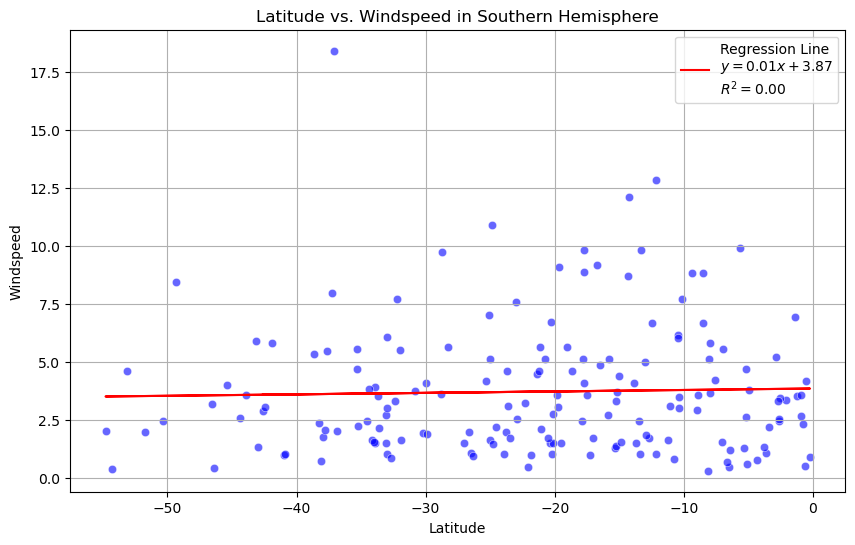

In [262]:
plt.figure(figsize=(10, 6))
plt.scatter(Southern_latitudes, Southern_windspeed, color='blue', alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot(Southern_latitudes, regression_lineW1, color='red', label=f'Regression Line\n$y={slope:.2f}x+{intercept:.2f}$\n$R^2={r_value**2:.2f}$')
plt.title('Latitude vs. Windspeed in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Final Findings.
#The temperature is maximum for the latitude 20 to 40 and is decreasing gradually from that hike in temp.
#The temperature is relatively higher for the northern hemisphere if we compare it to southern.
#The Air in the southern hemisphere is more Humid. The reason is that a lot of those cities are near to water body such as oceans and sea.
#The wind speed on the southern hemisphere is highest with a speed of nearly 18m/s for one city.